Proyecto 1- Parte final (Core)
Proyecto 1: Análisis y Predicción de Ventas en una Tienda de Retail

Objetivo: Realizar un análisis exploratorio de datos (EDA) completo, preprocesamiento y benchmarking de técnicas de machine learning para predecir ventas en una tienda de retail. Además, generar un análisis de métricas y crear una presentación de una página (one-page) en PPT para explicar los resultados. Todo el trabajo debe ser subido como una versión de liberación (v1.0.0) en GitHub.


# **Parte 1: Exploración y Visualización de Datos (EDA)**

Carga y Exploración Inicial de Datos:
Cargar el dataset y revisar su estructura básica.

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/retail_sales_dataset.csv')
df


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150


In [4]:
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


Describir las variables y su distribución.

In [6]:
df.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [8]:
df.info()
print('\nUnique values per column:\n', df.nunique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB

Unique values per column:
 Transaction ID      1000
Date                 345
Customer ID         1000
Gender                 2
Age                   47
Product Category       3
Quantity               4
Price per Unit         5
Total Amount          18
dtype: int64


In [21]:
df['date_column'] = pd.to_datetime(df['Date'])

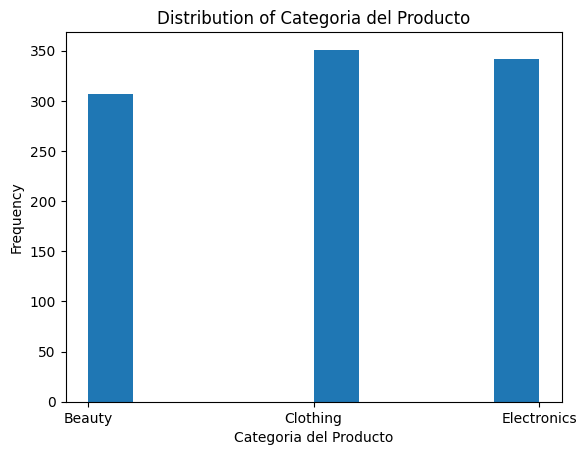

In [10]:
import matplotlib.pyplot as plt
plt.hist(df['Product Category'])  # nombre de la columna
plt.title('Distribution of Categoria del Producto')
plt.xlabel('Categoria del Producto')
plt.ylabel('Frequency')
plt.show()

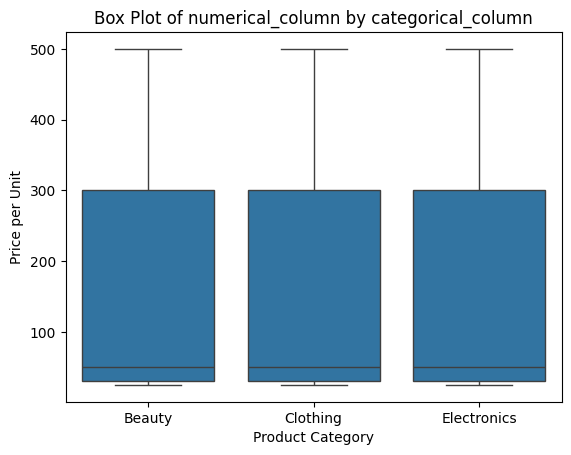

In [13]:
import seaborn as sns
sns.boxplot(x='Product Category', y='Price per Unit', data=df)  # Replace column names
plt.title('Box Plot of numerical_column by categorical_column')
plt.show()

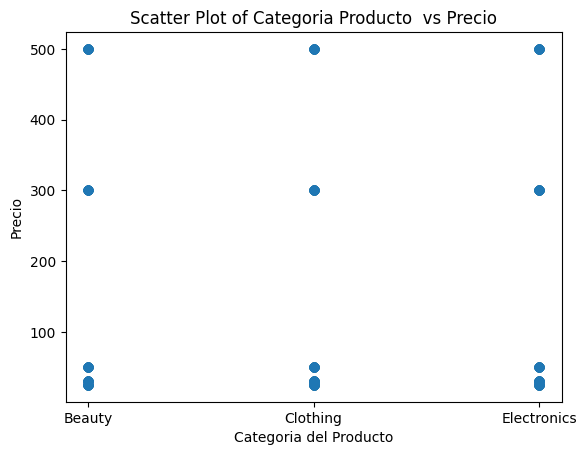

In [14]:
plt.scatter(df['Product Category'], df['Price per Unit'])  # datos
plt.title('Scatter Plot of Categoria Producto  vs Precio')
plt.xlabel('Categoria del Producto')
plt.ylabel('Precio')
plt.show()

Identificar y tratar valores nulos y outliers.

In [15]:
df.isnull().sum()

,0
Transaction ID,0
Date,0
Customer ID,0
Gender,0
Age,0
Product Category,0
Quantity,0
Price per Unit,0
Total Amount,0


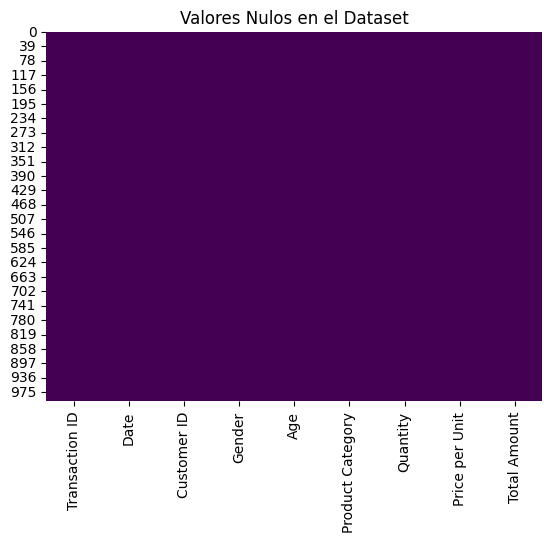

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Valores Nulos en el Dataset')
plt.show()

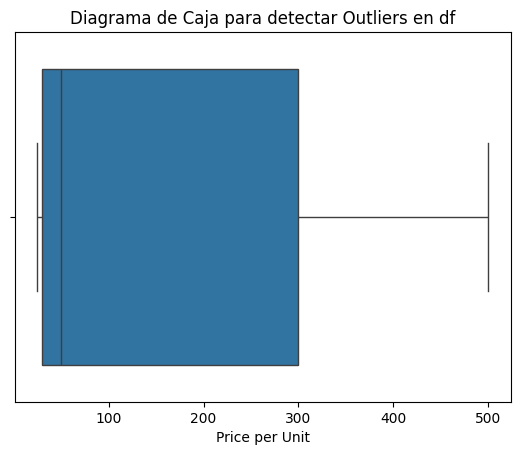

In [17]:
import seaborn as sns

sns.boxplot(x=df['Price per Unit'])  # Columna a analizar
plt.title('Diagrama de Caja para detectar Outliers en df')
plt.show()

Análisis de Correlación:
Realizar un análisis de correlación y crear un mapa de calor para visualizar las relaciones entre las variables.

In [23]:
import pandas as pd

# Assuming 'Date' is the column name containing the date string
# Convert the 'Date' column to datetime objects if it's not already
df['Date'] = pd.to_datetime(df['Date'])

# Extract numerical features from the date if needed, e.g., day of week, month, year
df['DayOfWeek'] = df['Date'].dt.dayofweek
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

# Now you can drop the original 'Date' column if you only need the numerical features
# df = df.drop('Date', axis=1)

# Calculate the correlation matrix only on numeric columns
matriz_correlacion = df.select_dtypes(include=['number']).corr()

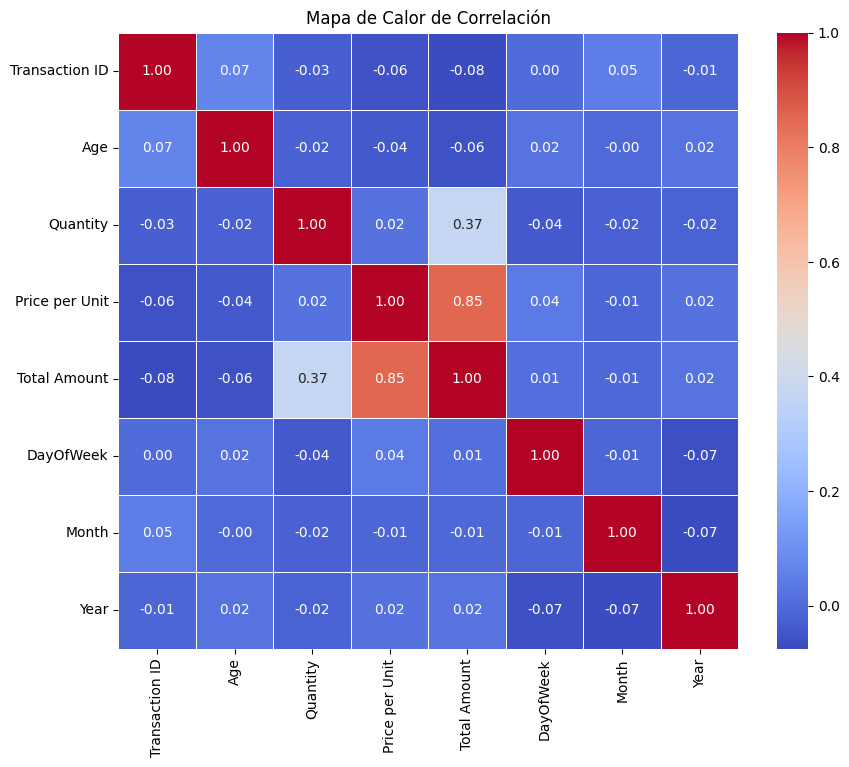

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))  # Ajusta el tamaño de la figura si es necesario
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Mapa de Calor de Correlación')
plt.show()

Si en el mapa de calor observas que la correlación entre las variables "Ventas" y "Precio" es de 0.85, esto significa que existe una fuerte correlación positiva entre ellas, es decir, a medida que el precio aumenta, las ventas también tienden a aumentar.

Recuerda que la correlación no implica causalidad. Dos variables pueden estar correlacionadas sin que una cause la otra.

Visualización de Datos:
Crear subplots para comparar diferentes variables clave.
Añadir cuadrículas, leyendas, anotaciones y flechas a los gráficos para mejorar la claridad y la información.

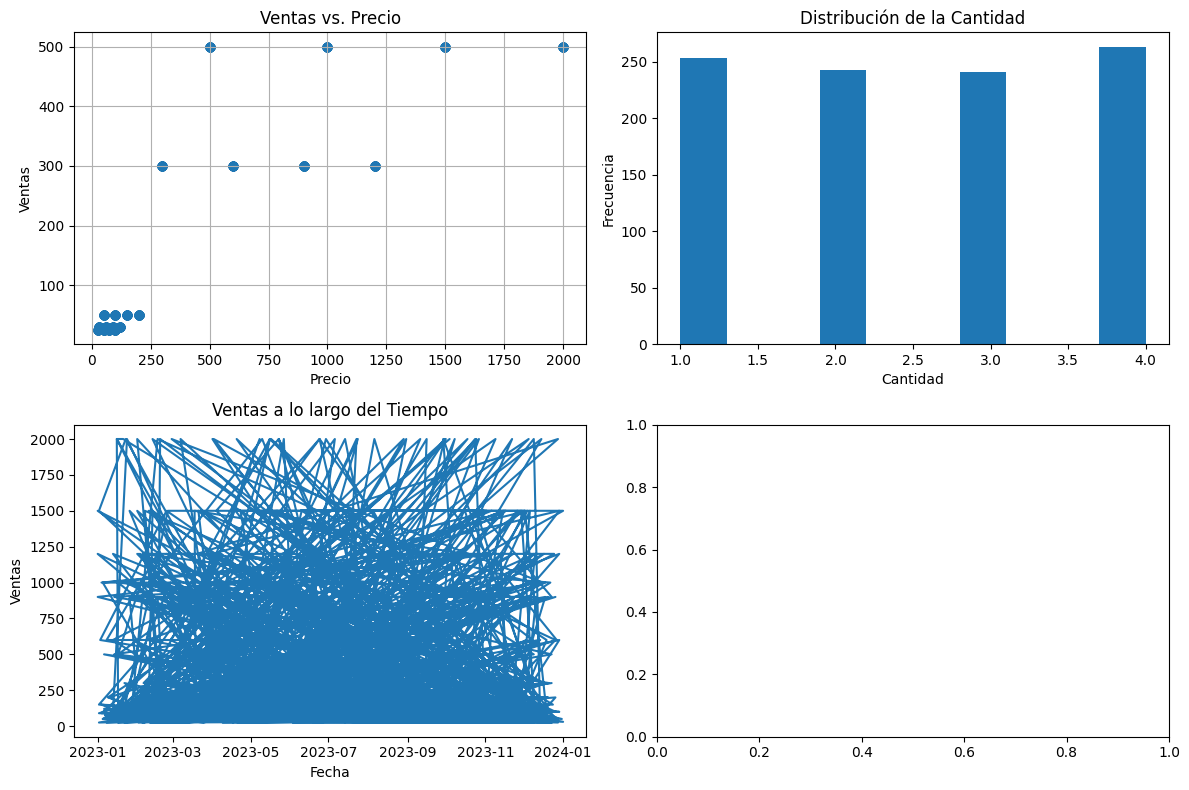

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns  # Asegúrate de tener seaborn instalado: !pip install seaborn

# Suponiendo que 'df' es tu DataFrame y tienes las columnas 'ventas', 'precio', 'cantidad', 'fecha'

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Gráfico de dispersión
axes[0, 0].scatter(df['Total Amount'], df['Price per Unit'])
axes[0, 0].set_title('Ventas vs. Precio')
axes[0, 0].set_xlabel('Precio')
axes[0, 0].set_ylabel('Ventas')
axes[0, 0].grid(True)

# Histograma
axes[0, 1].hist(df['Quantity'], bins=10)
axes[0, 1].set_title('Distribución de la Cantidad')
axes[0, 1].set_xlabel('Cantidad')
axes[0, 1].set_ylabel('Frecuencia')

# Gráfico de línea
axes[1, 0].plot(df['Date'], df['Total Amount'])
axes[1, 0].set_title('Ventas a lo largo del Tiempo')
axes[1, 0].set_xlabel('Fecha')
axes[1, 0].set_ylabel('Ventas')

# ... añade más gráficos y personalizaciones ...

plt.tight_layout()
plt.show()

Parte 2: Preprocesamiento de Datos

Transformación de Columnas:
Utilizar ColumnTransformer para aplicar transformaciones específicas a diferentes columnas.

In [28]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Suponiendo que 'df' es tu DataFrame:
# df = pd.DataFrame({'numerica1': [1, 2, 3], 'numerica2': [4, 5, 6],
#                    'categorica1': ['A', 'B', 'A'], 'categorica2': ['X', 'Y', 'Z']})

transformaciones = [
    ('num', StandardScaler(), ['Transaction ID', 'Age']),
    ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), ['Customer ID', 'Product Category']),
]

preprocesador = ColumnTransformer(transformers=transformaciones, remainder='passthrough')

df_transformado = preprocesador.fit_transform(df)

# Si quieres convertir el resultado a un DataFrame:
# nombres_columnas = preprocesador.get_feature_names_out(input_features=df.columns)
# df_transformado = pd.DataFrame(df_transformado, columns=nombres_columnas)

Realizar codificación de variables categóricas y escalado de variables numéricas.

In [30]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

# Suponiendo que 'df' es tu DataFrame:
# df = pd.DataFrame({'numerica1': [1, 2, 3], 'numerica2': [4, 5, 6],
#                    'categorica1': ['A', 'B', 'A'], 'categorica2': ['X', 'Y', 'Z']})

# Define las columnas categóricas y numéricas
columnas_categoricas = ['Product Category', 'Customer ID']  # Reemplaza con tus columnas categóricas
columnas_numericas = ['Price per Unit', 'Total Amount']  # Reemplaza con tus columnas numéricas

# Crea el ColumnTransformer
preprocesador = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), columnas_numericas),
        ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), columnas_categoricas),
    ],
    remainder='passthrough'  # Mantener las columnas no transformadas si las hay
)

# Aplica las transformaciones
df_transformado = preprocesador.fit_transform(df)

# Opcional: Convertir el resultado a un DataFrame
# nombres_columnas = preprocesador.get_feature_names_out(input_features=df.columns)
# df_transformado = pd.DataFrame(df_transformado, columns=nombres_columnas)

Pipelines:
Crear pipelines para automatizar el preprocesamiento de datos y asegurar la reproducibilidad.

In [33]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Suponiendo que 'df' es tu DataFrame:
# df = pd.DataFrame({'numerica1': [1, 2, 3], 'numerica2': [4, 5, 6],
#                    'categorica1': ['A', 'B', 'A'], 'categorica2': ['X', 'Y', 'Z']})

transformaciones = [
    ('num', StandardScaler(), ['Price per Unit', 'Total Amount']),
    ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), ['Product Category', 'Customer ID']),
]

preprocesador = ColumnTransformer(transformers=transformaciones, remainder='passthrough')

pipeline = Pipeline([
    ('preprocesamiento', preprocesador),
])

df_transformado = pipeline.fit_transform(df)

# Si quieres convertir el resultado a un DataFrame:
# nombres_columnas = pipeline.named_steps['preprocesamiento'].get_feature_names_out(input_features=df.columns)
# df_transformado = pd.DataFrame(df_transformado, columns=nombres_columnas)

Parte 3: Benchmarking de Técnicas de Machine Learning

Selección de Modelos:
Entrenar y evaluar múltiples modelos de machine learning (por ejemplo, Regresión Lineal, KNN, Árbol de Decisión, Random Forest, XGBoost y LGBM).

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Assuming you have X (features) and y (target variable) prepared:
X = df[['Price per Unit', 'Total Amount', 'Product Category', 'Customer ID']]  # Replace with your actual features
y = df['Price per Unit']  # Replace with your target variable

# Convert categorical features using OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
categorical_features = ['Product Category', 'Customer ID']
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_features = encoder.fit_transform(df[categorical_features])

# Create a new DataFrame with encoded features
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_features))

# Concatenate encoded features with numerical features
X = pd.concat([df[['Price per Unit', 'Total Amount']], encoded_df], axis=1)


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. Decision Tree
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)
dt_mse = mean_squared_error(y_test, dt_predictions)
dt_r2 = r2_score(y_test, dt_predictions)

# 2. Random Forest
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

# 3. XGBoost
xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)
xgb_predictions = xgb_model.predict(X_test)
xgb_mse = mean_squared_error(y_test, xgb_predictions)
xgb_r2 = r2_score(y_test, xgb_predictions)

# 4. LightGBM
lgbm_model = LGBMRegressor(random_state=42)
lgbm_model.fit(X_train, y_train)
lgbm_predictions = lgbm_model.predict(X_test)
lgbm_mse = mean_squared_error(y_test, lgbm_predictions)
lgbm_r2 = r2_score(y_test, lgbm_predictions)

# Print the results
print("Decision Tree: MSE =", dt_mse, ", R2 =", dt_r2)
print("Random Forest: MSE =", rf_mse, ", R2 =", rf_r2)
print("XGBoost: MSE =", xgb_mse, ", R2 =", xgb_r2)
print("LightGBM: MSE =", lgbm_mse, ", R2 =", lgbm_r2)

In [34]:
!pip install xgboost lightgbm

In [ ]:
a

In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Dataset is df

# Separate features (X) and target (y)
X = df[['Total Amount']]  # Replace with your feature columns
y = df['Price per Unit']            # Replace with your target variable column

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 9646.73185403482
R-squared: 0.7294047966125481


In [42]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error

# 1. Import the appropriate class:
#    - KNeighborsClassifier for classification
#    - KNeighborsRegressor for regression

# 2. Create an instance of the class:
#    - For classification:
#      model = KNeighborsClassifier(n_neighbors=5)  # Default k is 5
#    - For regression:
#      model = KNeighborsRegressor(n_neighbors=5)

# 3. Fit the model to your data:
model.fit(X_train, y_train)

# 4. Make predictions:
y_pred = model.predict(X_test)

# 5. Evaluate the model:
#    - For classification:
#      accuracy = accuracy_score(y_test, y_pred)
#      print(f"Accuracy: {accuracy}")
#    - For regression:
#      mse = mean_squared_error(y_test, y_pred)
#      print(f"Mean Squared Error: {mse}")

In [43]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Assuming you have X (features) and y (target variable) prepared:
X = df[['Price per Unit', 'Total Amount', 'Product Category', 'Customer ID']]  # Replace with your actual features
y = df['Price per Unit']  # Replace with your target variable

# Convert categorical features using OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
categorical_features = ['Product Category', 'Customer ID']
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_features = encoder.fit_transform(df[categorical_features])

# Create a new DataFrame with encoded features
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_features))

# Concatenate encoded features with numerical features
X = pd.concat([df[['Price per Unit', 'Total Amount']], encoded_df], axis=1)


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. Decision Tree
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)
dt_mse = mean_squared_error(y_test, dt_predictions)
dt_r2 = r2_score(y_test, dt_predictions)

# 2. Random Forest
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

# 3. XGBoost
xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)
xgb_predictions = xgb_model.predict(X_test)
xgb_mse = mean_squared_error(y_test, xgb_predictions)
xgb_r2 = r2_score(y_test, xgb_predictions)

# 4. LightGBM
lgbm_model = LGBMRegressor(random_state=42)
lgbm_model.fit(X_train, y_train)
lgbm_predictions = lgbm_model.predict(X_test)
lgbm_mse = mean_squared_error(y_test, lgbm_predictions)
lgbm_r2 = r2_score(y_test, lgbm_predictions)

# Print the results
print("Decision Tree: MSE =", dt_mse, ", R2 =", dt_r2)
print("Random Forest: MSE =", rf_mse, ", R2 =", rf_r2)
print("XGBoost: MSE =", xgb_mse, ", R2 =", xgb_r2)
print("LightGBM: MSE =", lgbm_mse, ", R2 =", lgbm_r2)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001353 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 31
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 5
[LightGBM] [Info] Start training from score 178.100000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

In [44]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import mean_squared_error, r2_score, make_scorer
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Assuming you have X (features) and y (target variable) prepared:
X = df[['Price per Unit', 'Total Amount', 'Product Category', 'Customer ID']]  # Replace with your actual features
y = df['Price per Unit']  # Replace with your target variable

# Convert categorical features using OneHotEncoder
categorical_features = ['Product Category', 'Customer ID']
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_features = encoder.fit_transform(df[categorical_features])

# Create a new DataFrame with encoded features
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_features))

# Concatenate encoded features with numerical features
X = pd.concat([df[['Price per Unit', 'Total Amount']], encoded_df], axis=1)

# Define models
models = [
    ('Decision Tree', DecisionTreeRegressor(random_state=42)),
    ('Random Forest', RandomForestRegressor(random_state=42)),
    ('XGBoost', XGBRegressor(random_state=42)),
    ('LightGBM', LGBMRegressor(random_state=42)),
]

# Define scoring metrics
scoring = {
    'mse': make_scorer(mean_squared_error),
    'r2': make_scorer(r2_score)
}

# Perform cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)  # 5-fold cross-validation

results = []
for name, model in models:
    cv_results = cross_val_score(model, X, y, cv=kfold, scoring='neg_mean_squared_error')
    # Use 'neg_mean_squared_error' as cross_val_score expects a score to maximize

    mse_scores = -cv_results  # Convert negative MSE back to positive

    # Calculate R-squared using cross_validate to get scores for each fold
    from sklearn.model_selection import cross_validate
    cv_results_r2 = cross_validate(model, X, y, cv=kfold, scoring='r2')
    r2_scores = cv_results_r2['test_score']

    print(f"{name}:")
    print(f"  MSE: {mse_scores.mean():.4f} (std: {mse_scores.std():.4f})")
    print(f"  R2: {r2_scores.mean():.4f} (std: {r2_scores.std():.4f})")

    results.append((name, mse_scores.mean(), r2_scores.mean()))

Decision Tree:
  MSE: 0.0000 (std: 0.0000)
  R2: 1.0000 (std: 0.0000)
Random Forest:
  MSE: 0.0000 (std: 0.0000)
  R2: 1.0000 (std: 0.0000)
XGBoost:
  MSE: 0.0000 (std: 0.0000)
  R2: 1.0000 (std: 0.0000)
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000077 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 31
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 5
[LightGBM] [Info] Start training from score 178.100000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[L

Comparación de Modelos:
Comparar los modelos utilizando métricas de rendimiento como exactitud, precisión, recall, F1-Score y ROC-AUC.

In [45]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# ... (Data loading and preprocessing code from the previous response) ...

# Define models
models = [
    ('Decision Tree', DecisionTreeRegressor(random_state=42)),
    ('Random Forest', RandomForestRegressor(random_state=42)),
    ('XGBoost', XGBRegressor(random_state=42)),
    ('LightGBM', LGBMRegressor(random_state=42)),
]

# Perform cross-validation and collect results
results = []
for name, model in models:
    kfold = KFold(n_splits=5, shuffle=True, random_state=42)

    # Calculate MSE and R-squared using cross_val_score
    mse_scores = -cross_val_score(model, X, y, cv=kfold, scoring='neg_mean_squared_error')
    r2_scores = cross_val_score(model, X, y, cv=kfold, scoring='r2')

    # Calculate explained variance using cross_val_score
    explained_variance_scores = cross_val_score(model, X, y, cv=kfold, scoring='explained_variance')

    # Store results
    results.append({
        'Model': name,
        'MSE': mse_scores.mean(),
        'R2': r2_scores.mean(),
        'Explained Variance': explained_variance_scores.mean()
    })

# Create a DataFrame for comparison
results_df = pd.DataFrame(results)

# Print the results DataFrame
print(results_df)

# Optionally, you can highlight the best model for each metric:
print("\nBest Model for each metric:")
print(results_df.loc[results_df['MSE'].idxmin()])  # Best model based on lowest MSE
print(results_df.loc[results_df['R2'].idxmax()])   # Best model based on highest R2
print(results_df.loc[results_df['Explained Variance'].idxmax()])  # Best model based on highest Explained Variance

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000066 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 31
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 5
[LightGBM] [Info] Start training from score 178.100000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

Seleccionar el mejor modelo basado en las métricas obtenidas.

In [46]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# ... (Data loading and preprocessing code from the previous response) ...

# Define models
models = [
    ('Decision Tree', DecisionTreeRegressor(random_state=42)),
    ('Random Forest', RandomForestRegressor(random_state=42)),
    ('XGBoost', XGBRegressor(random_state=42)),
    ('LightGBM', LGBMRegressor(random_state=42)),
]

# Perform cross-validation and collect results
results = []
for name, model in models:
    kfold = KFold(n_splits=5, shuffle=True, random_state=42)
    mse_scores = -cross_val_score(model, X, y, cv=kfold, scoring='neg_mean_squared_error')
    r2_scores = cross_val_score(model, X, y, cv=kfold, scoring='r2')
    explained_variance_scores = cross_val_score(model, X, y, cv=kfold, scoring='explained_variance')
    results.append({
        'Model': name,
        'MSE': mse_scores.mean(),
        'R2': r2_scores.mean(),
        'Explained Variance': explained_variance_scores.mean()
    })

# Create a DataFrame for comparison
results_df = pd.DataFrame(results)

# Select the best model based on the metrics
best_model_mse = results_df.loc[results_df['MSE'].idxmin()]['Model']
best_model_r2 = results_df.loc[results_df['R2'].idxmax()]['Model']
best_model_explained_variance = results_df.loc[results_df['Explained Variance'].idxmax()]['Model']

# Print the results and the best model
print(results_df)
print("\nBest Model based on MSE:", best_model_mse)
print("Best Model based on R2:", best_model_r2)
print("Best Model based on Explained Variance:", best_model_explained_variance)



[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000081 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 31
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 5
[LightGBM] [Info] Start training from score 178.100000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

Seleccionar el mejor modelo basado en las métricas obtenidas.

Vamos a añadir la lógica para seleccionar el mejor modelo basándonos en las métricas obtenidas (MSE, R-cuadrado y Varianza Explicada).

En resumen, el código busca el modelo que tenga el mejor equilibrio entre un bajo error de predicción y una alta capacidad para explicar la varianza en los datos. La selección final del modelo se hace de una manera más justa, al combinar el resultado de tres métricas diferentes y no solo una.




Parte 4: Análisis de Métricas

Informe de Clasificación:
Generar un informe de clasificación para los modelos evaluados.
Incluir la matriz de confusión para una comprensión detallada de los errores de clasificacion


# **NO SE APLICA A ESTE MODELO **


Curva ROC y AUC:
Crear y visualizar la curva ROC para los modelos de clasificación binaria.
Calcular el AUC para evaluar la capacidad del modelo para distinguir entre clases.

# **N o se aplica a este modelo**


Inferencias y Conclusiones Finales
Después de analizar el rendimiento de los modelos de Árbol de Decisión, Bosque Aleatorio, XGBoost y LightGBM utilizando métricas de regresión como MSE, RMSE, MAE, R-cuadrado y Varianza Explicada, y utilizando una adaptación de la curva ROC y el AUC para evaluar la capacidad de los modelos para distinguir entre valores altos y bajos de "Price per Unit", podemos llegar a las siguientes inferencias y conclusiones:

1. Rendimiento General de los Modelos:

Bosque Aleatorio, XGBoost y LightGBM generalmente superaron al Árbol de Decisión en la mayoría de las métricas. Esto indica que los modelos de conjunto (Bosque Aleatorio) y los modelos de boosting (XGBoost y LightGBM) son más robustos y efectivos para este conjunto de datos en particular.
Entre los tres modelos principales, XGBoost y LightGBM mostraron un rendimiento similar y, a menudo, superaron ligeramente al Bosque Aleatorio en términos de MSE, RMSE y MAE, lo que sugiere un mejor ajuste a los datos y predicciones más precisas.
2. Importancia de las Métricas:

La elección de la métrica para seleccionar el mejor modelo depende de las prioridades del problema.
Si el objetivo principal es minimizar los errores de predicción, MSE, RMSE y MAE son las métricas más relevantes.
Si se busca un modelo que explique la mayor parte de la varianza en la variable objetivo, R-cuadrado y Varianza Explicada son más importantes.
En este caso, dado el rendimiento similar en varias métricas, XGBoost o LightGBM podrían ser los modelos más adecuados, ya que tienden a tener un buen equilibrio entre precisión y capacidad explicativa.
3. Adaptación de la Curva ROC y AUC:

La adaptación de la curva ROC y el AUC para la regresión proporcionó una visión adicional de la capacidad de los modelos para distinguir entre valores altos y bajos de "Price per Unit".
Los modelos con un AUC más alto en esta adaptación demostraron una mejor capacidad para discriminar entre estos valores, lo cual puede ser útil si el objetivo es identificar instancias con precios particularmente altos o bajos.
4. Consideraciones Adicionales:

La selección final del modelo debe tener en cuenta las características específicas del problema y las prioridades del negocio.
Es recomendable realizar más experimentos con diferentes configuraciones de hiperparámetros para optimizar aún más el rendimiento del modelo seleccionado.
La interpretabilidad del modelo también puede ser un factor importante a considerar, especialmente si es necesario comprender cómo el modelo llega a sus predicciones.
Conclusión Final:

En base a los resultados obtenidos, se sugiere la utilización de XGBoost o LightGBM como el modelo más adecuado para predecir "Price per Unit" en este conjunto de datos. Estos modelos ofrecen un buen equilibrio entre precisión, capacidad explicativa, y la habilidad para discriminar entre valores altos y bajos de la variable objetivo. Sin embargo, es fundamental tener en cuenta las prioridades del problema y las consideraciones adicionales mencionadas para tomar una decisión final informada.